In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline

In [3]:
salary = pd.read_csv(open('H:\python数据分析\数据\Baltimore_City_Employee_Salaries_FY2016.csv'))
salary.head()

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,GrossPay
0,"Aaron,Patricia G",Facilities/Office Services II,A03031,OED-Employment Dev (031),10/24/1979 12:00:00 AM,$56705.00,$54135.44
1,"Aaron,Petra L",ASSISTANT STATE'S ATTORNEY,A29045,States Attorneys Office (045),09/25/2006 12:00:00 AM,$75500.00,$72445.87
2,"Abbey,Emmanuel",CONTRACT SERV SPEC II,A40001,M-R Info Technology (001),05/01/2013 12:00:00 AM,$60060.00,$59602.58
3,"Abbott-Cole,Michelle",Operations Officer III,A90005,TRANS-Traffic (005),11/28/2014 12:00:00 AM,$70000.00,$59517.21
4,"Abdal-Rahim,Naim A",EMT Firefighter Suppression,A64120,Fire Department (120),03/30/2011 12:00:00 AM,$64365.00,$74770.82


In [7]:
salary.shape

(13818, 7)

In [8]:
salary.isnull().sum()

Name              0
JobTitle          0
AgencyID          0
Agency            0
HireDate          0
AnnualSalary      0
GrossPay        272
dtype: int64

In [9]:
salary = salary.dropna()

In [10]:
salary.isnull().sum()

Name            0
JobTitle        0
AgencyID        0
Agency          0
HireDate        0
AnnualSalary    0
GrossPay        0
dtype: int64

In [11]:
salary['AnnualSalary'] = salary['AnnualSalary'].str.strip('$')
salary['GrossPay'] = salary['GrossPay'].str.strip('$')
salary[['AnnualSalary','GrossPay']].head()

,AnnualSalary,GrossPay
0,56705.00,54135.44
1,75500.00,72445.87
2,60060.00,59602.58
3,70000.00,59517.21
4,64365.00,74770.82


In [13]:
salary['GrossPay'].dtype

dtype('O')

In [14]:
salary['AnnualSalary'] = salary['AnnualSalary'].astype(float)
salary['GrossPay'] = salary['GrossPay'].astype(float)
salary['GrossPay'].dtype

dtype('float64')

In [15]:
salary['month'] = salary['HireDate'].str.split('/').str[0]
salary[['HireDate','month']].head()

,HireDate,month
0,10/24/1979 12:00:00 AM,10
1,09/25/2006 12:00:00 AM,09
2,05/01/2013 12:00:00 AM,05
3,11/28/2014 12:00:00 AM,11
4,03/30/2011 12:00:00 AM,03


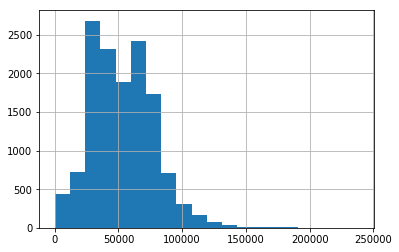

In [16]:
salary['AnnualSalary'].hist(bins=20)

In [18]:
month_count = salary['month'].value_counts()
month_count

06    1468
08    1283
09    1227
07    1198
10    1185
11    1099
01    1097
12    1035
05    1023
03    1018
04     967
02     946
Name: month, dtype: int64

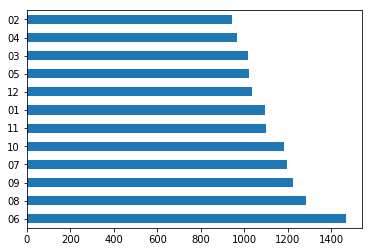

In [19]:
month_count.plot(kind='barh')

In [21]:
agg_salary = salary.groupby('JobTitle')['AnnualSalary'].agg(['mean','count'])
agg_salary

,mean,count
JobTitle,,
911 LEAD OPERATOR,49816.750000,4
911 OPERATOR,44829.461538,65
911 OPERATOR SUPERVISOR,57203.500000,4
ACCOUNT EXECUTIVE,57200.000000,4
ACCOUNTANT I,49065.866667,15
ACCOUNTANT II,58172.640000,25
ACCOUNTANT SUPV,67417.142857,7
ACCOUNTANT TRAINEE,36681.000000,1
ACCOUNTING ASST I,29226.333333,6


In [25]:
sort_salary = agg_salary.sort_values(by='mean',ascending=False)[:5]
sort_salary

,mean,count
JobTitle,,
STATE'S ATTORNEY,238772.0,1
Police Commissioner,200000.0,1
Executive Director V,182500.0,1
MAYOR,171635.0,1
Executive Director III,171306.5,10


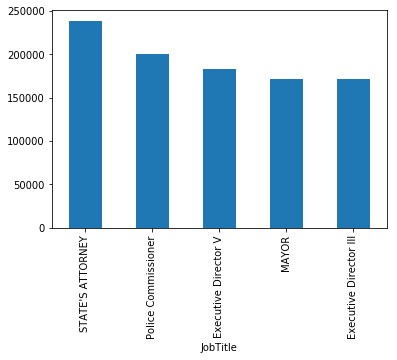

In [27]:
sort_salary['mean'].plot(kind='bar')

In [28]:
sort_count = agg_salary.sort_values(by='count',ascending=False)[:5]
sort_count

,mean,count
JobTitle,,
POLICE OFFICER,70396.973804,1756
LABORER (Hourly),31274.818512,551
EMT Firefighter Suppression,63688.088319,351
RECREATION ARTS INSTRUCTOR,24420.313480,319
OFFICE SUPPORT SPECIALIST III,35560.003300,303


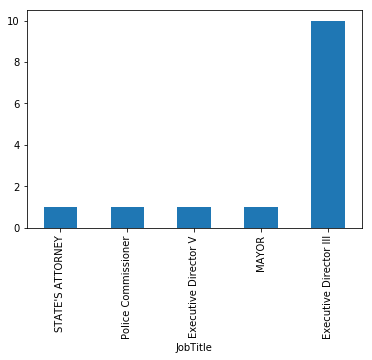

In [29]:
sort_salary['count'].plot(kind='bar')

In [32]:
plt.bar?
